In [51]:
import radiative_transfer_bnn as rt
import matplotlib.pyplot as plt



In [52]:
model = rt.RadiativeTransferBNN(1000, 0.3, 0.01, "n")
model.preprocess_data()
model.train_model(250, 200)
wavelength = model.wavelength
mean_pred_results, std_pred_results = model.test_model()



c:\Users\joshu\OneDrive\Desktop\Physics_Year_3\Final_year_project\Github\project_script\src\semester2\week2\radiative_transfer_bnn.py:281: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([


Training the model...
- epoch 1/250 - cost: 644.714, kl: 0.045
- epoch 2/250 - cost: 544.371, kl: 0.076
- epoch 3/250 - cost: 423.028, kl: 0.106
- epoch 4/250 - cost: 306.154, kl: 0.134
- epoch 5/250 - cost: 263.596, kl: 0.158
- epoch 6/250 - cost: 181.069, kl: 0.178
- epoch 7/250 - cost: 110.529, kl: 0.193
- epoch 8/250 - cost: 73.870, kl: 0.206
- epoch 9/250 - cost: 68.377, kl: 0.216
- epoch 10/250 - cost: 37.823, kl: 0.223
- epoch 11/250 - cost: 29.920, kl: 0.229
- epoch 12/250 - cost: 22.698, kl: 0.233
- epoch 13/250 - cost: 15.430, kl: 0.236
- epoch 14/250 - cost: 10.242, kl: 0.239
- epoch 15/250 - cost: 11.421, kl: 0.240
- epoch 16/250 - cost: 5.336, kl: 0.242
- epoch 17/250 - cost: 4.144, kl: 0.243
- epoch 18/250 - cost: 2.945, kl: 0.243
- epoch 19/250 - cost: 2.207, kl: 0.244
- epoch 20/250 - cost: 1.997, kl: 0.244
- epoch 21/250 - cost: 2.569, kl: 0.245
- epoch 22/250 - cost: 1.455, kl: 0.245
- epoch 23/250 - cost: 2.164, kl: 0.245
- epoch 24/250 - cost: 1.332, kl: 0.245
- epo

In [53]:
print(model.X_test.shape)
print(model.y_test.shape)
print(mean_pred_results.shape)

print(mean_pred_results[1,0:5])
print(mean_pred_results[60,0:5])

torch.Size([200, 3])
torch.Size([200, 1, 113])
(200, 113)
[-0.63872135 -0.627585   -0.6480478  -0.59643495 -0.5685124 ]
[-0.6386722  -0.62765753 -0.6476992  -0.5968764  -0.56851566]


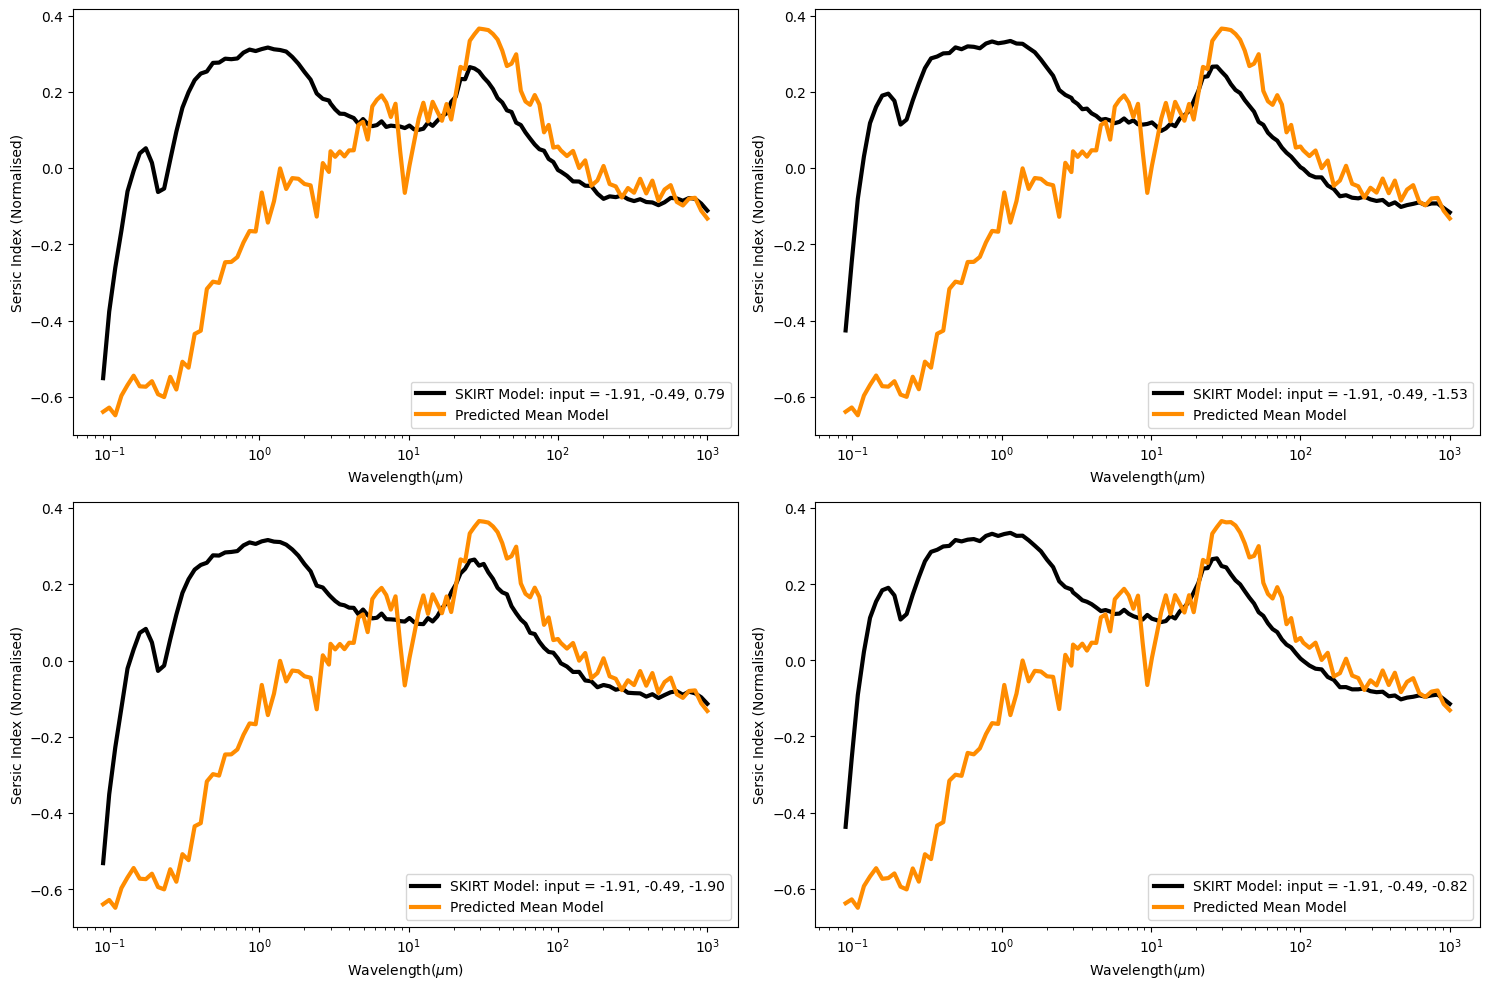

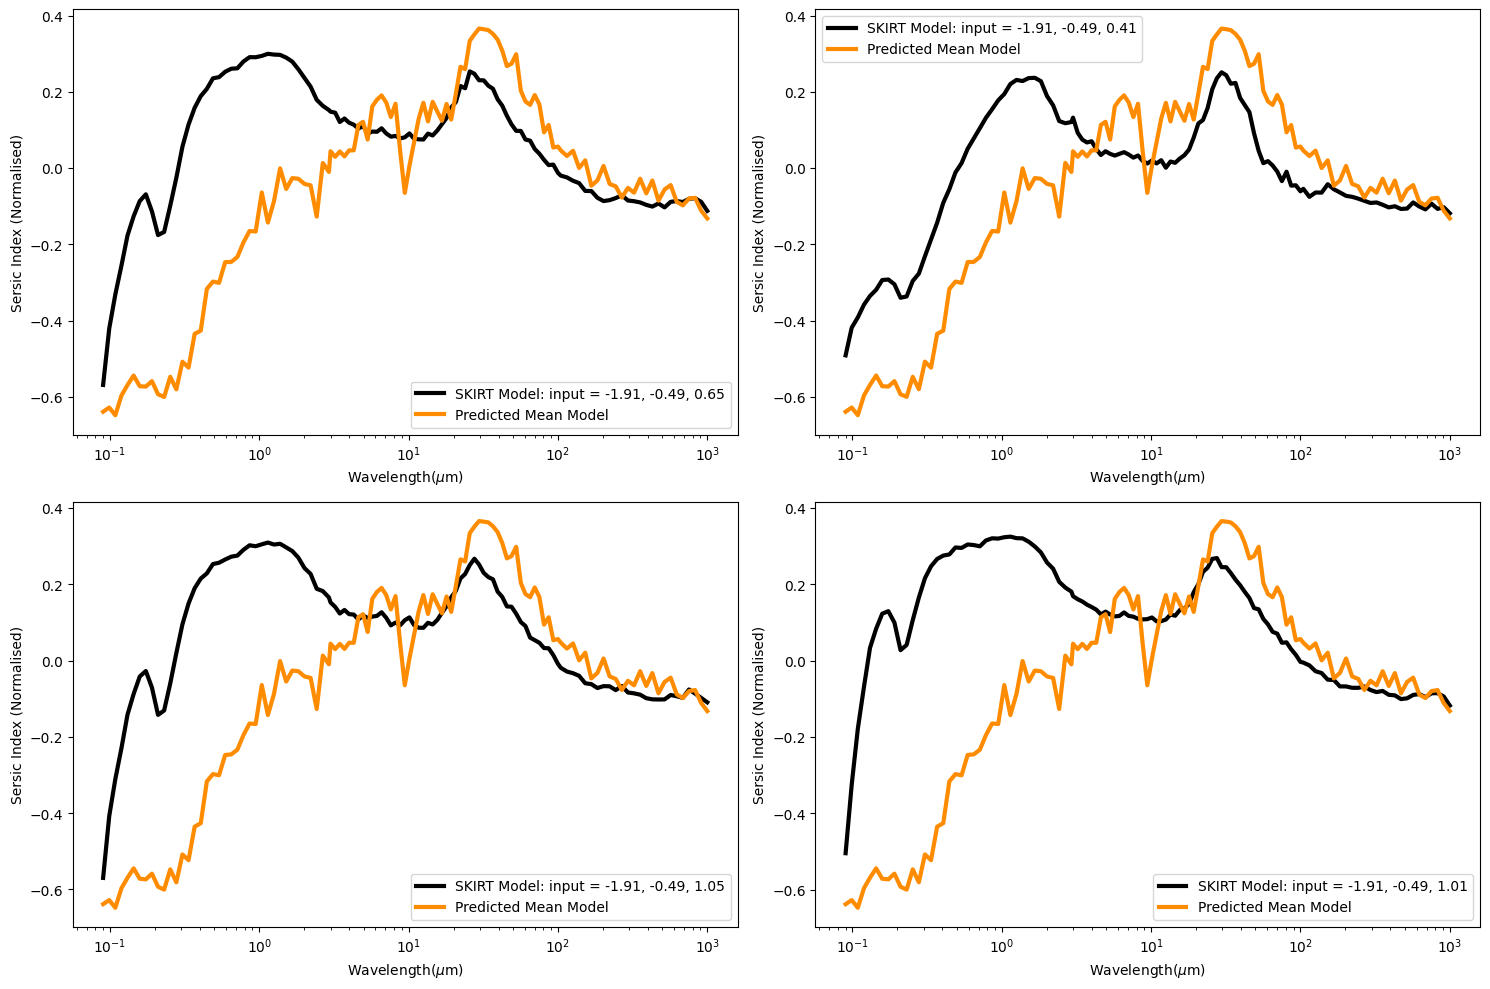

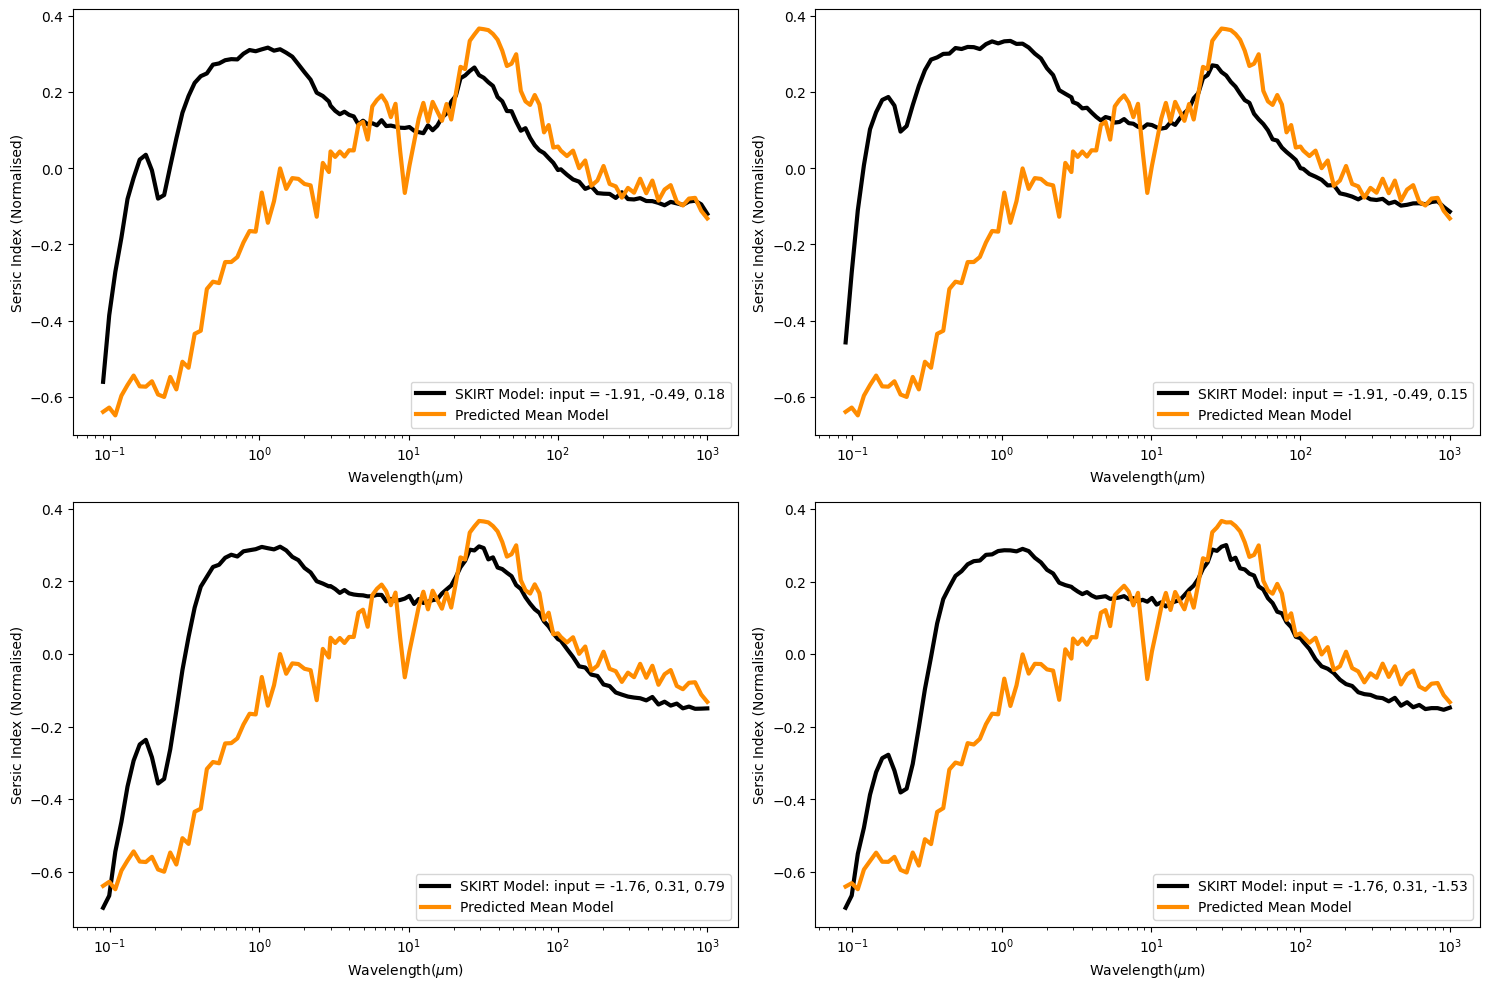

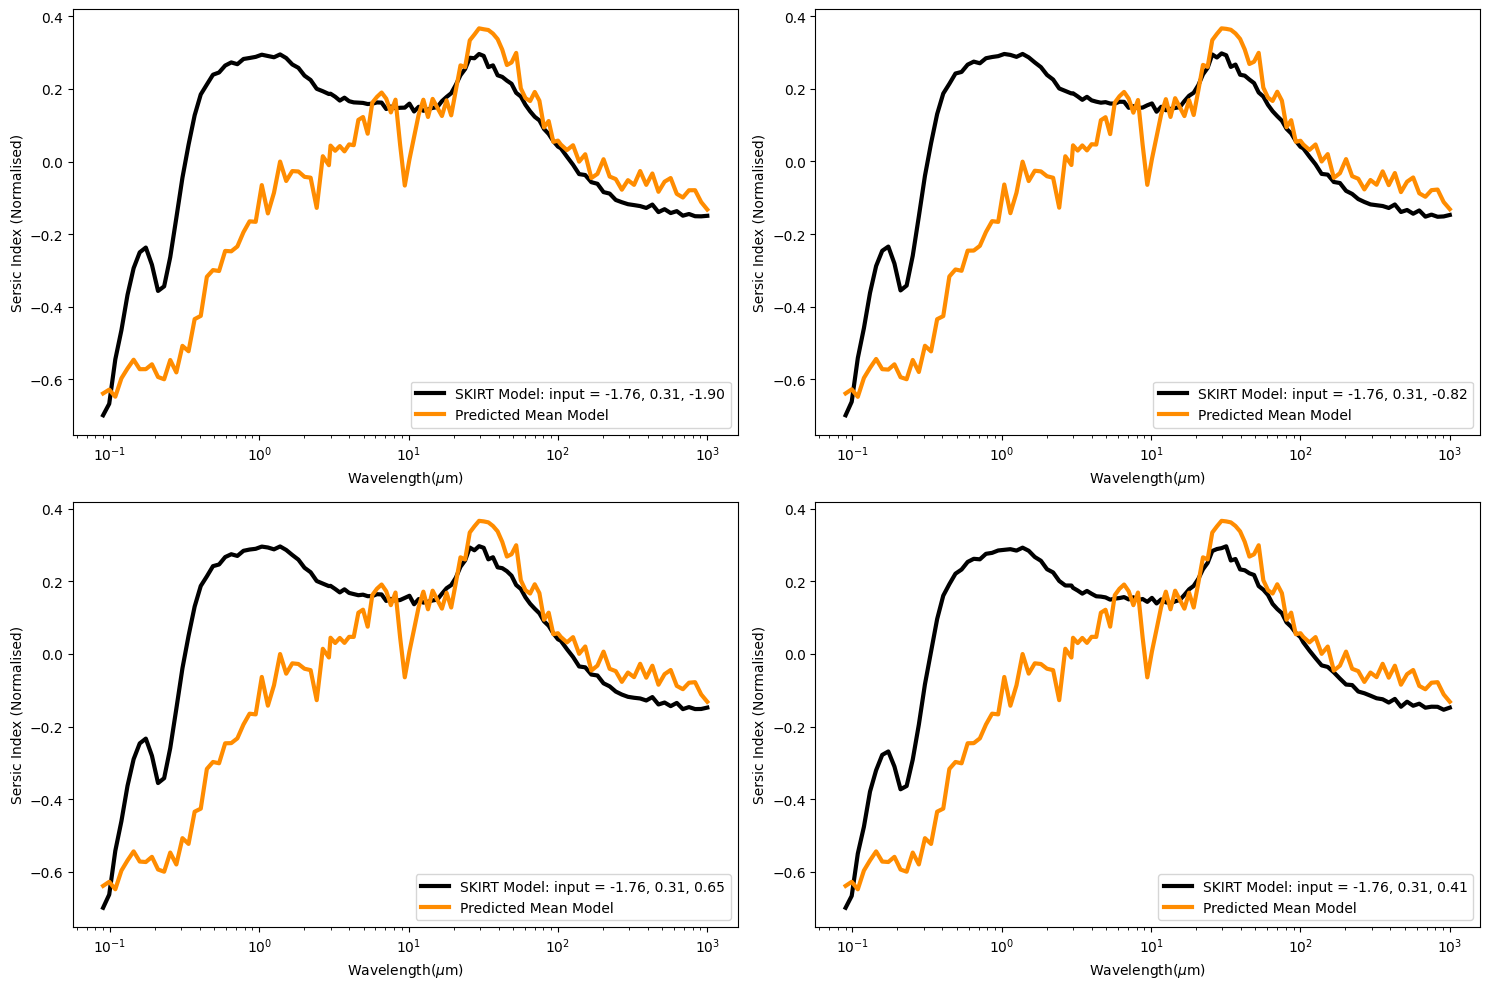

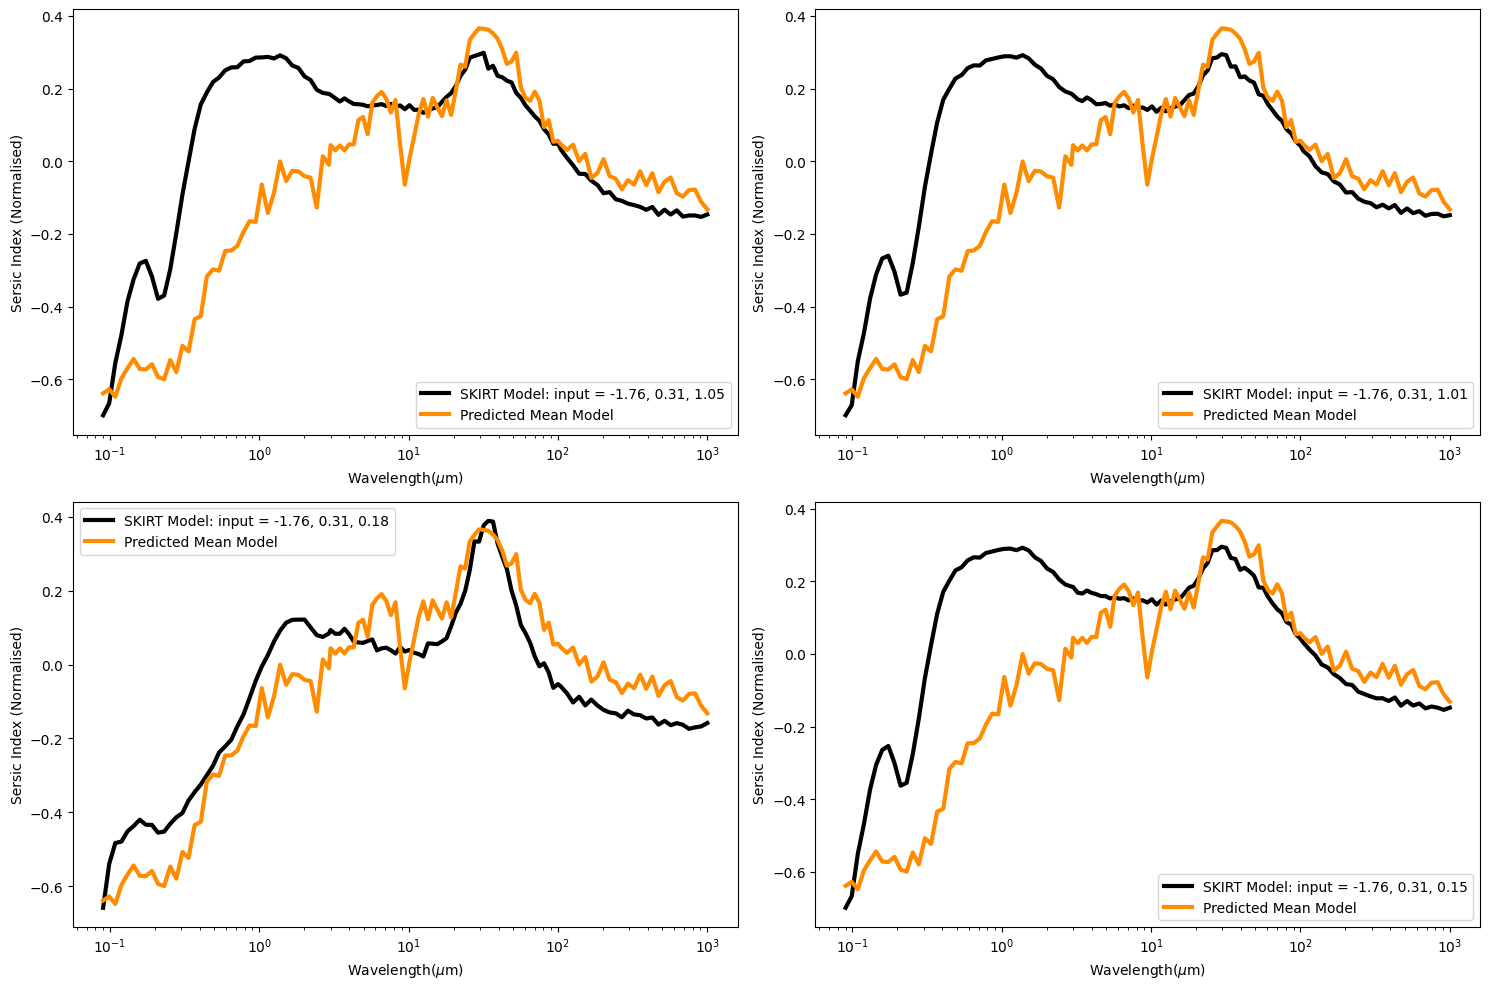

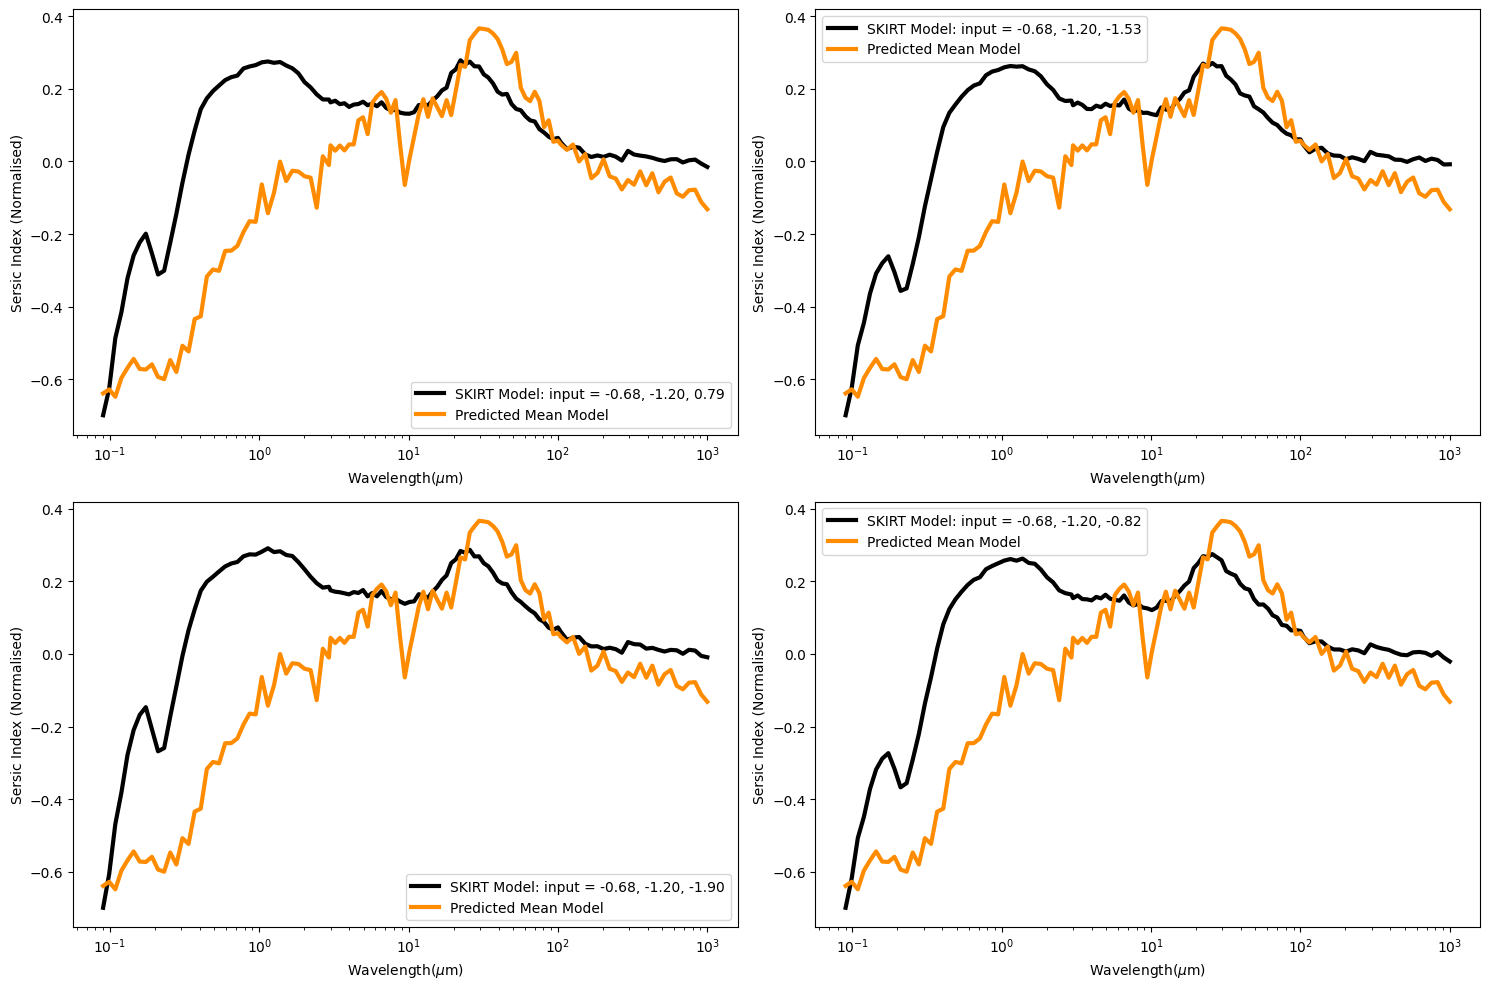

In [54]:



i = 0

test_inputs = model.X_test
test_output = model.y_test

while i <24:

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    ax1.plot(wavelength,test_output[i,0,:],color='black',lw=3,label=f'SKIRT Model: input = {test_inputs[i,0]:2.2f}, {test_inputs[i,1]:2.2f}, {test_inputs[i,2]:2.2f}')
    ax1.plot(wavelength,mean_pred_results[i,:],color='darkorange',lw=3,label='Predicted Mean Model')
    ax2.plot(wavelength,test_output[i+1,0,:],color='black',lw=3,label=f'SKIRT Model: input = {test_inputs[i+1,0]:2.2f}, {test_inputs[i+1,1]:2.2f}, {test_inputs[i+1,2]:2.2f}')
    ax2.plot(wavelength,mean_pred_results[i+1,:],color='darkorange',lw=3,label='Predicted Mean Model')
    ax3.plot(wavelength,test_output[i+2,0,:],color='black',lw=3,label=f'SKIRT Model: input = {test_inputs[i+2,0]:2.2f}, {test_inputs[i+2,1]:2.2f}, {test_inputs[i+2,2]:2.2f}')
    ax3.plot(wavelength,mean_pred_results[i+2,:],color='darkorange',lw=3,label='Predicted Mean Model')
    ax4.plot(wavelength,test_output[i+3,0,:],color='black',lw=3,label=f'SKIRT Model: input = {test_inputs[i+3,0]:2.2f}, {test_inputs[i+3,1]:2.2f}, {test_inputs[i+3,2]:2.2f}')
    ax4.plot(wavelength,mean_pred_results[i+3,:],color='darkorange',lw=3,label='Predicted Mean Model')


    for ax in fig.get_axes():
        #ax.label_outer()
        ax.set(xlabel=f'Wavelength($\\mu$m)', ylabel='Sersic Index (Normalised)')
        ax.set_xscale('log')
        ax.legend()


    plt.tight_layout()

    ax.legend()
    plt.show()
    plt.close()
    
    
    i = i+4
